# Setting up

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets, tree
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Import data
from preprocessing import load_bikes_prepr

# Interpretability measures
from interpretability import PDP

In [ ]:
def find_best_model(model, parameters, X_train, y_train): 
    clf = GridSearchCV(model, parameters, scoring=('neg_root_mean_squared_error'), cv=KFold())
    clf.fit(X_train, y_train)

    return clf

def print_errors(clf, model_name, X_test, y_test):
    y_pred = clf.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print("RMSE ({}): {}".format(model_name, rmse))
    r2 = r2_score(y_test, y_pred)
    print("R-squared score ({}) : {}".format(model_name, r2))

In [ ]:
X, y, feature_names = load_bikes_prepr()
seed = 3012

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [ ]:
print(X)

[[-1.3566343  -1.0051343  -1.61043792 ... -1.0932806   0.9473725
  -1.55388851]
 [-1.3566343  -1.0051343  -1.61043792 ... -1.18173227  0.89553869
  -1.55388851]
 [-1.3566343  -1.0051343  -1.61043792 ... -1.18173227  0.89553869
  -1.55388851]
 ...
 [-1.3566343   0.99489192  1.58846698 ... -1.26960201 -0.14113744
  -0.21169121]
 [-1.3566343   0.99489192  1.58846698 ... -1.18173227 -0.34847267
  -0.45609864]
 [-1.3566343   0.99489192  1.58846698 ... -1.18173227  0.11803159
  -0.45609864]]


# Decision tree regressor

## Training model

In [ ]:
model_name = "decision tree regressor"
parameters = {'criterion': ('squared_error', 'friedman_mse', 'absolute_error', 'poisson')}
# parameters = {'criterion': ('squared_error', 'friedman_mse', 'absolute_error', 'poisson'), 'splitter': ('best', 'random') , 'min_samples_split': np.arange(2, 301)}
tr = tree.DecisionTreeRegressor(random_state=seed)

clf = find_best_model(tr, parameters, X_train, y_train)
print_errors(clf, model_name, X_test, y_test)

model = clf.best_estimator_
model

RMSE (decision tree regressor): 58.94590711387484
R-squared score (decision tree regressor) : 0.892936277909009


DecisionTreeRegressor(random_state=3012)

## Intrinsic interpretability

<AxesSubplot:>

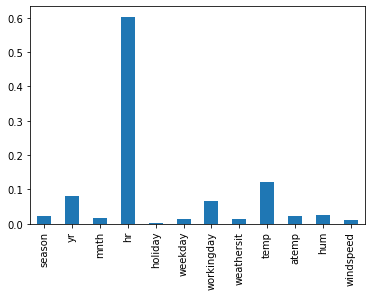

In [ ]:
df = pd.Series(data=model.feature_importances_, index=feature_names)
df.plot.bar()

## Partial dependence plot

In [ ]:
print(feature_names)

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')


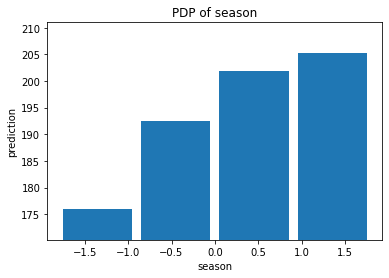

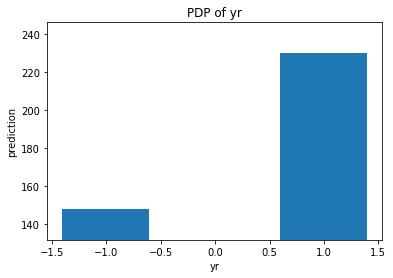

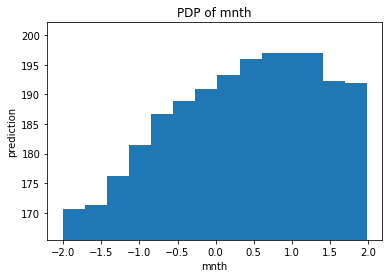

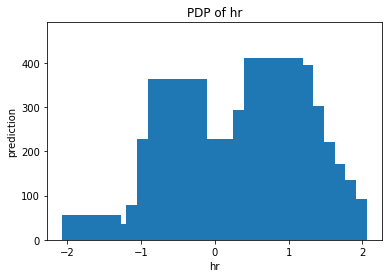

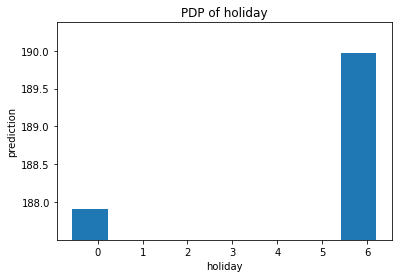

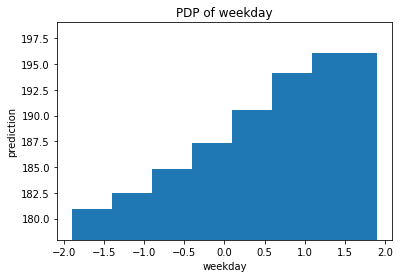

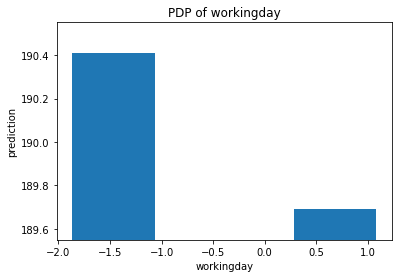

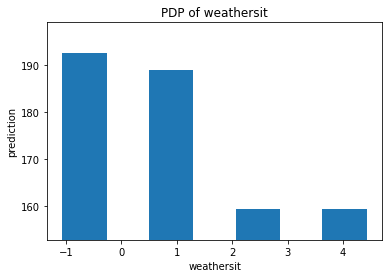

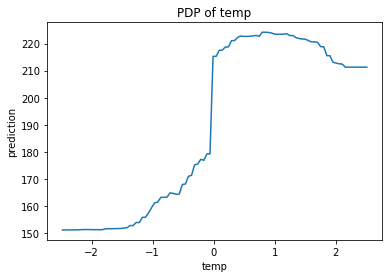

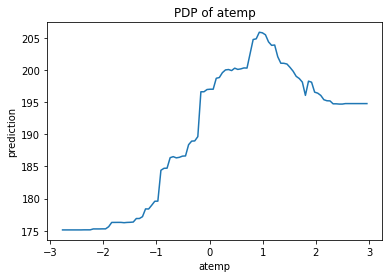

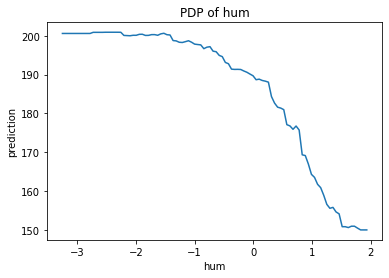

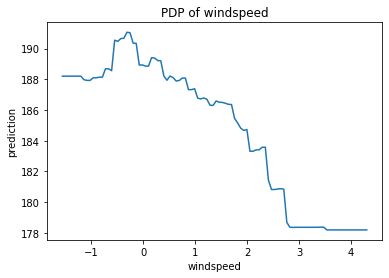

In [ ]:
categorical = [True, True, True, True, True, True, True, True, False, False, False, False]

for i in range(X_test.shape[1]):
    PDP(i, feature_names[i], model, X_test, y_test, categorical=categorical[i])
    plt.show()
    plt.close()

# Linear regression models

## Training model

Lasso and Ridge give the same errors

In [ ]:
model_name = "linear regression"
parameters = {}
linreg = LinearRegression()

clf = find_best_model(linreg, parameters, X_train, y_train)
print_errors(clf, model_name, X_test, y_test)

model = clf.best_estimator_
model

RMSE (linear regression): 140.7242912588483
R-squared score (linear regression) : 0.3897986460392311


LinearRegression()

## Intrinsic interpretability

<AxesSubplot:>

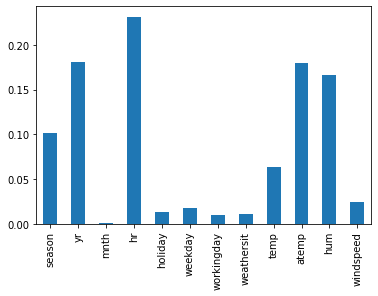

In [ ]:
df = pd.Series(data=np.abs(model.coef_)/np.sum(np.abs(model.coef_)), index=feature_names)
df.plot.bar()

## Partial dependence plot

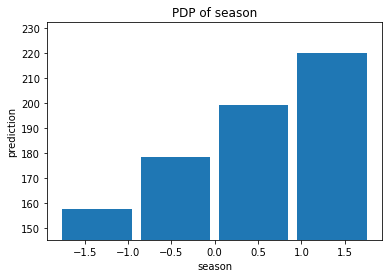

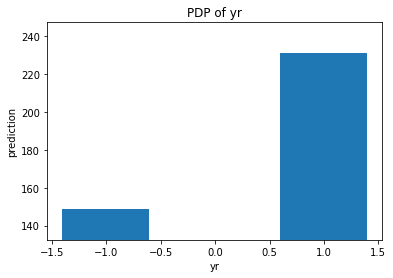

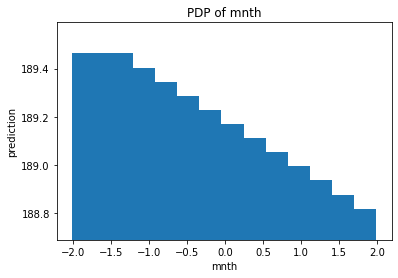

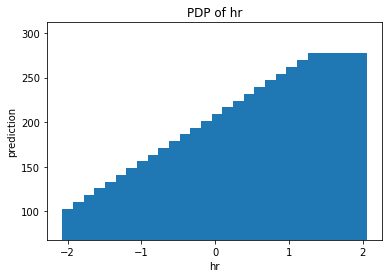

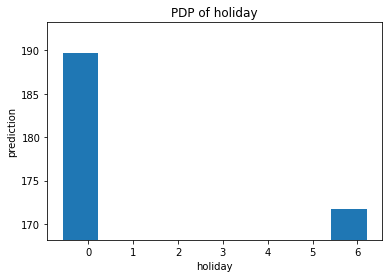

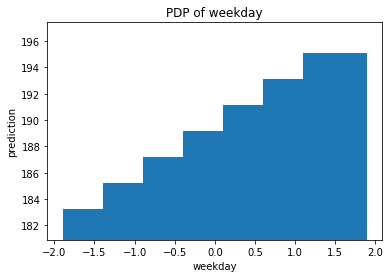

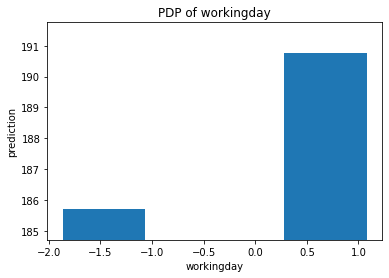

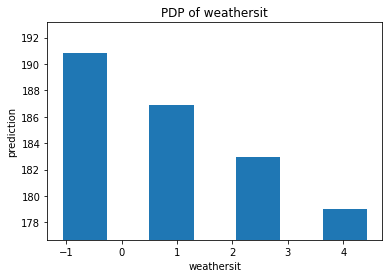

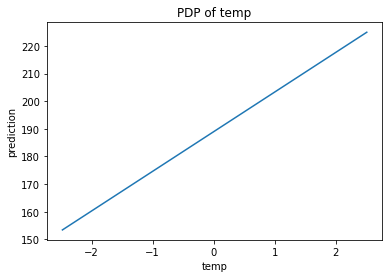

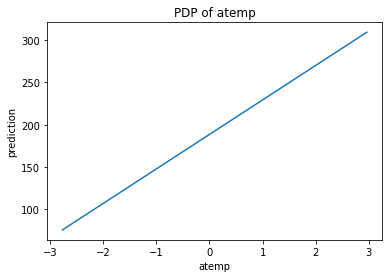

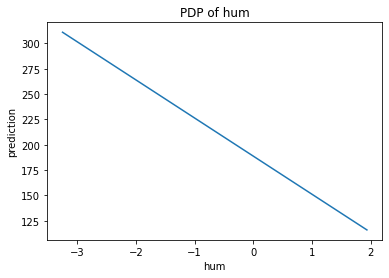

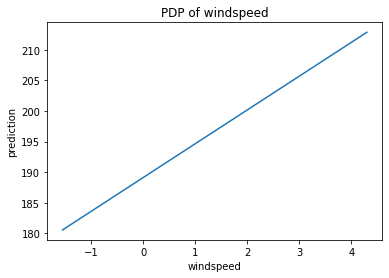

In [ ]:
categorical = [True, True, True, True, True, True, True, True, False, False, False, False]

for i in range(X_test.shape[1]):
    PDP(i, feature_names[i], model, X_test, y_test, categorical=categorical[i])
    plt.show()
    plt.close()

# KNN regressor

## Training model

In [ ]:
print(X_train.shape)

(13903, 12)


In [ ]:
model_name = "k-nearest neighbors"
parameters = {'n_neighbors': np.arange(1, 11, 1), 'weights': ('uniform', 'distance')}
# parameters = {'n_neighbors': np.arange(1, 13903, ), 'weights': ('uniform', 'distance')}
kNN = KNeighborsRegressor()

clf = find_best_model(kNN, parameters, X_train, y_train)
print_errors(clf, model_name, X_test, y_test)

model = clf.best_estimator_
model

RMSE (k-nearest neighbors): 103.1210375516704
R-squared score (k-nearest neighbors) : 0.672335361561309


KNeighborsRegressor(n_neighbors=7, weights='distance')

## Partial dependence plot

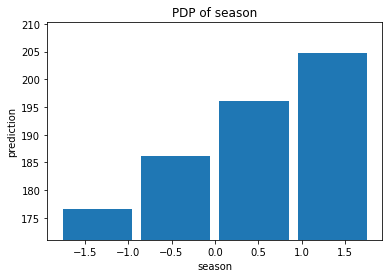

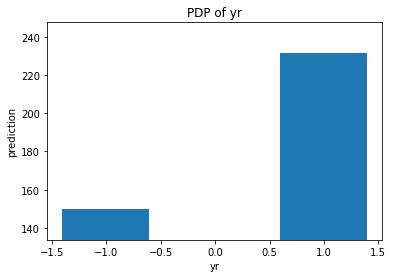

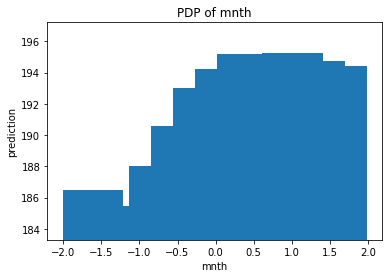

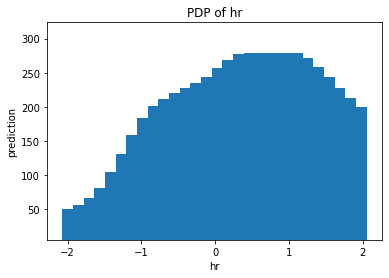

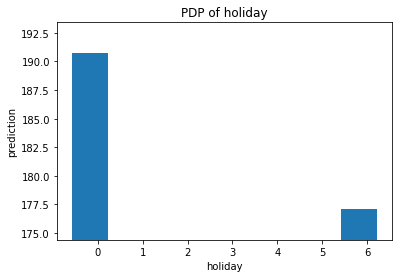

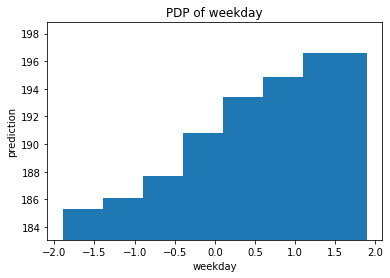

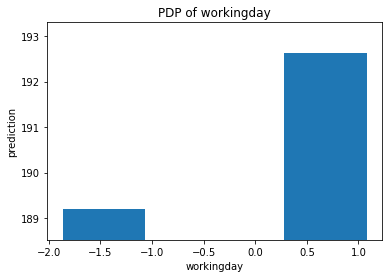

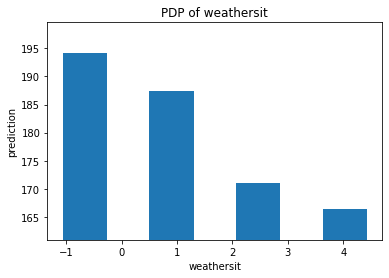

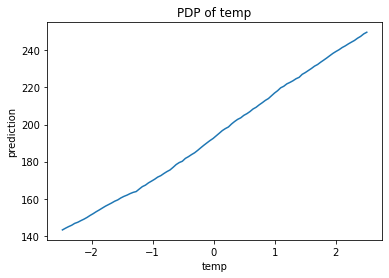

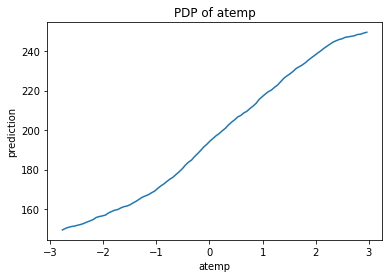

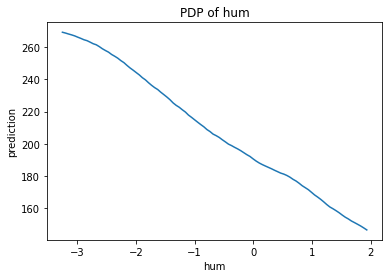

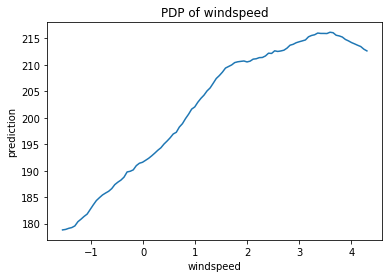

In [ ]:
categorical = [True, True, True, True, True, True, True, True, False, False, False, False]

for i in range(X_test.shape[1]):
    PDP(i, feature_names[i], model, X_test, y_test, categorical=categorical[i])
    plt.show()
    plt.close()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5161fece-8ef6-4825-9ea6-16ebba884483' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>